## Importing Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

## About dataset
The MNIST dataset is a large collection of handwritten digits, widely used for training and testing machine learning models, particularly in image recognition and pattern recognition.

In [ ]:
#loading the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

## Data Preprocessing

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


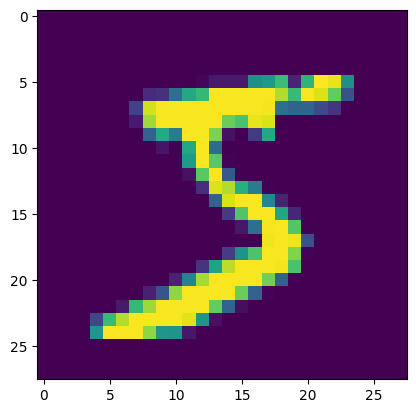

In [ ]:
plt.imshow(X_train[0])

In [ ]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in y_train
print(np.unique(y_train))
# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# scale the values
X_train = X_train / 255
X_test = X_test / 255

## Model Creation

In [ ]:
# setting layers of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# model training
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8408 - loss: 0.5298
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9564 - loss: 0.1492
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9683 - loss: 0.1068
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9757 - loss: 0.0820
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9808 - loss: 0.0659
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9841 - loss: 0.0538
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9867 - loss: 0.0454
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9884 - loss: 0.0384
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9901 - loss: 0.0335
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9912 - loss: 0.0294


## Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9692 - loss: 0.1226
Test accuracy: 0.972100019454956


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


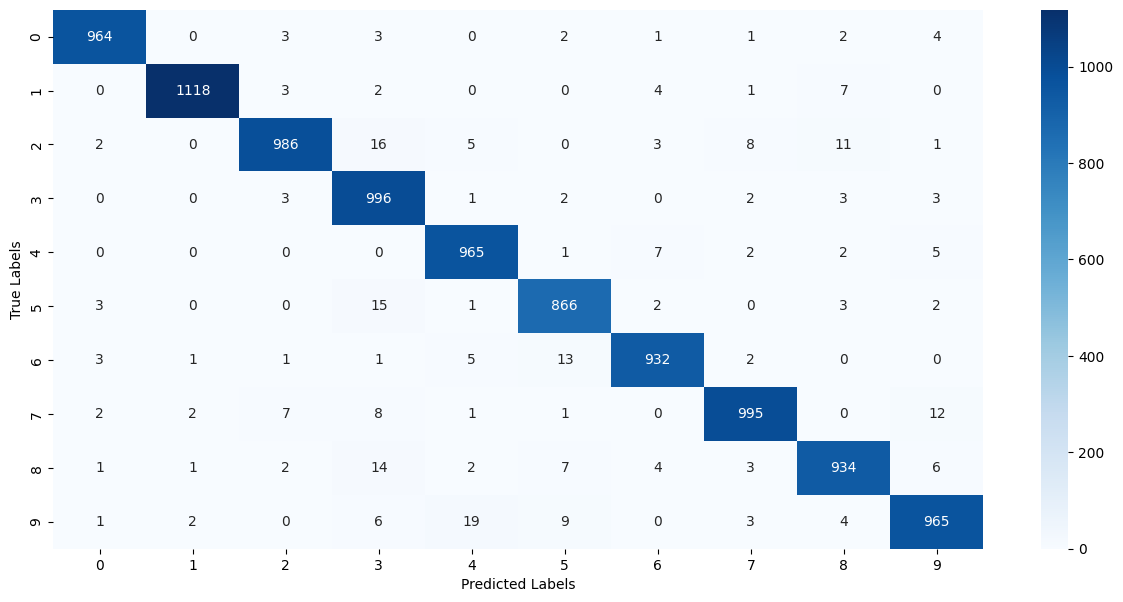

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
conf_mat = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

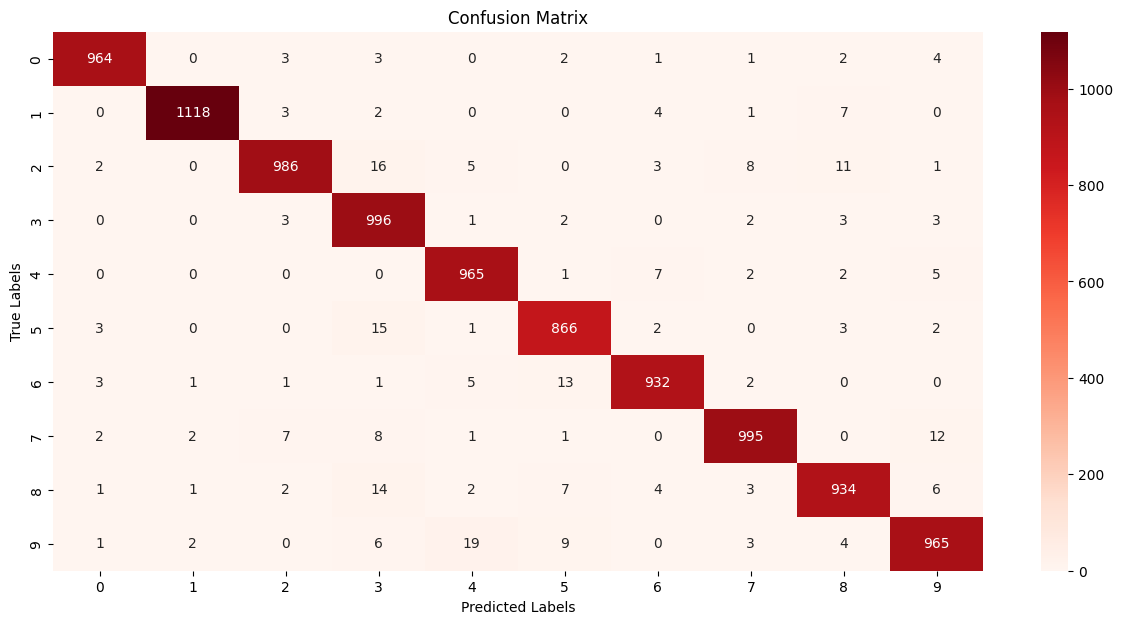

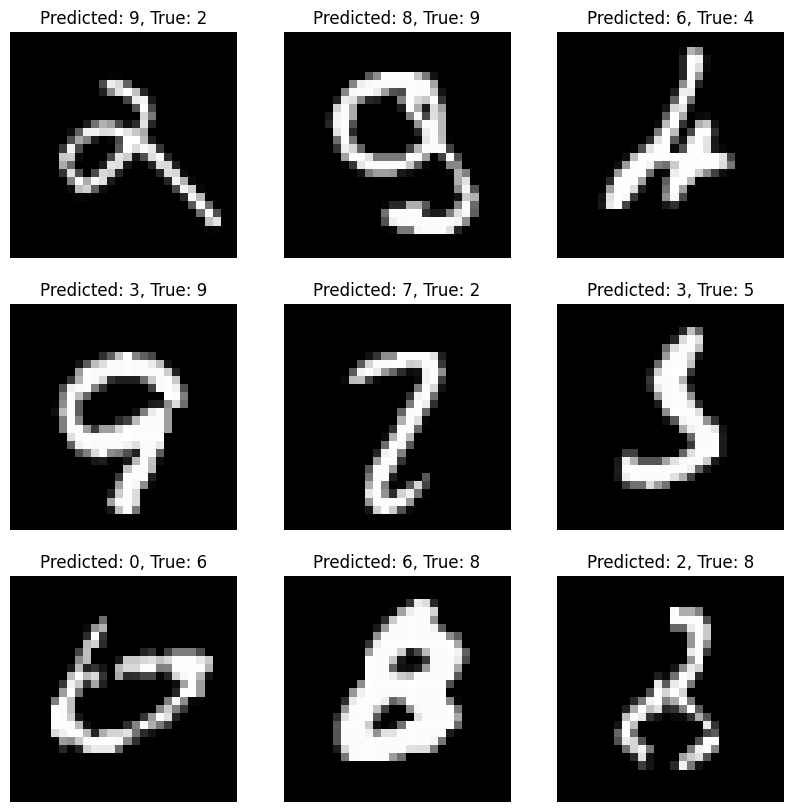

In [ ]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')  # Use a different colormap
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

# Finding the indices of the misclassified images
misclassified_indices = np.where(y_test != np.array(y_pred_labels))

# Displaying the first 9 misclassified images with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(min(9, len(misclassified_indices[0]))):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_test[misclassified_indices[0][i]], cmap='gray')
  plt.title(f"Predicted: {y_pred_labels[misclassified_indices[0][i]]}, True: {y_test[misclassified_indices[0][i]]}")
  plt.axis('off')
plt.show()